In [11]:
# ============================
# Week 3 – Exploratory & Statistical Analysis
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline


In [12]:
# Load the cleaned dataset from Week 2
df = pd.read_csv("cleaned_dataset.csv")  # change filename if needed
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (15031, 9)


,transaction_id,user_id,date,transaction_type,category,amount,payment_mode,location,notes
0,T03512,U039,2021-12-22,Expense,Rent,998,Cash,Pune,Paid electricity bill
1,T03261,U179,NaN,Expense,Food,$143,Card,Delhi,Grocery shopping
2,T04316,U143,2022-10-18,Expense,Rent,149,Cash,Bengaluru,Gift
3,T05649,U079,NaN,Expense,Rent,49,UPI,Hyderabad,Paid electricity bill
4,T14750,U020,NaN,Income,Other Income,"83,802",Bank Transfer,Chennai,Gift via app


**Interpretation:**  
- Dataset contains transaction records with columns: `transaction_id`, `user_id`, `date`, `transaction_type`, `category`, `amount`, `payment_mode`, `location`, and `notes`.  
- `amount` is currently a string with symbols; `date` may have missing values.  
- Further cleaning is needed to convert `amount` to numeric and `date` to datetime for analysis.


In [13]:
# Preprocess Amount and Date

# Clean 'amount' column: remove $ and commas, convert to numeric
df['amount'] = df['amount'].astype(str).str.replace('[\$,]', '', regex=True)
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df.info()
# Summary statistics for numerical columns
print(df.describe())

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\user\AppData\Local\Temp\ipykernel_13736\2444066572.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['amount'] = df['amount'].astype(str).str.replace('[\$,]', '', regex=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15031 entries, 0 to 15030
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    15031 non-null  object        
 1   user_id           15031 non-null  object        
 2   date              2242 non-null   datetime64[ns]
 3   transaction_type  15031 non-null  object        
 4   category          15031 non-null  object        
 5   amount            13210 non-null  float64       
 6   payment_mode      15031 non-null  object        
 7   location          15031 non-null  object        
 8   notes             15031 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 1.0+ MB
                                date         amount
count                           2242   13210.000000
mean   2020-12-24 02:16:09.848349696   25656.697502
min              2019-01-01 00:00:00   -1313.000000
25%              20

**Interpretation:**  
- The `amount` column is now numeric and ready for statistical analysis.  
- `date` is converted to datetime format, enabling temporal analysis.  
- Missing or invalid values are automatically converted to NaT or NaN.
 
- `amount` shows minimum, maximum, mean, median, and standard deviation.  
- Helps understand the scale and spread of transaction amounts.  
- Outliers can be identified by comparing min/max values to quartiles.


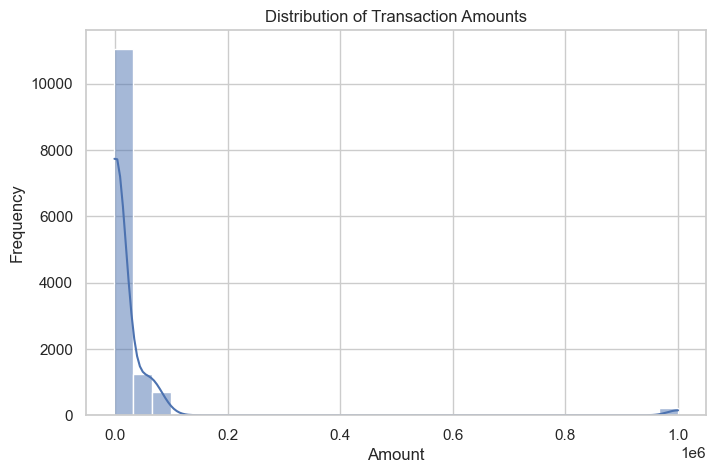

In [14]:
# Distribution of Transaction Amounts
plt.figure(figsize=(8,5))
sns.histplot(df['amount'], bins=30, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


**Interpretation:**  
- Most transactions are small to moderate in value.  
- Right-skewed distribution indicates a few high-value transactions (outliers).  
- KDE line shows the density of transaction amounts across the range.


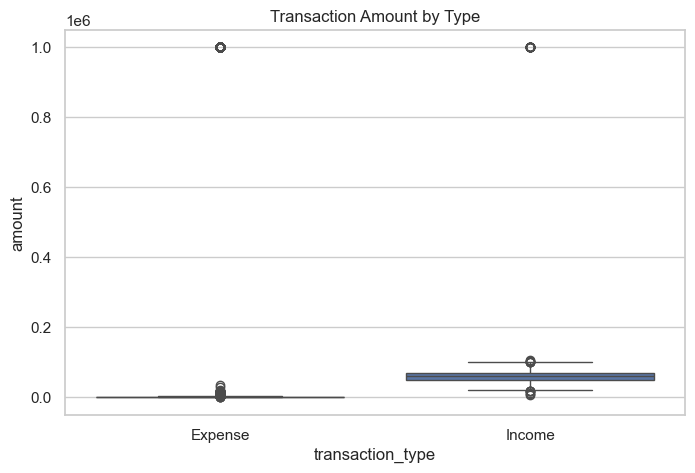

In [15]:
# Transaction type vs Amount 
plt.figure(figsize=(8,5))
sns.boxplot(x='transaction_type', y='amount', data=df)
plt.title("Transaction Amount by Type")
plt.show()


**Interpretation:**  
- Income transactions generally have higher amounts than Expenses.  
- Boxplots display median, interquartile range, and outliers.  
- Outliers indicate occasional unusually large transactions in both types.


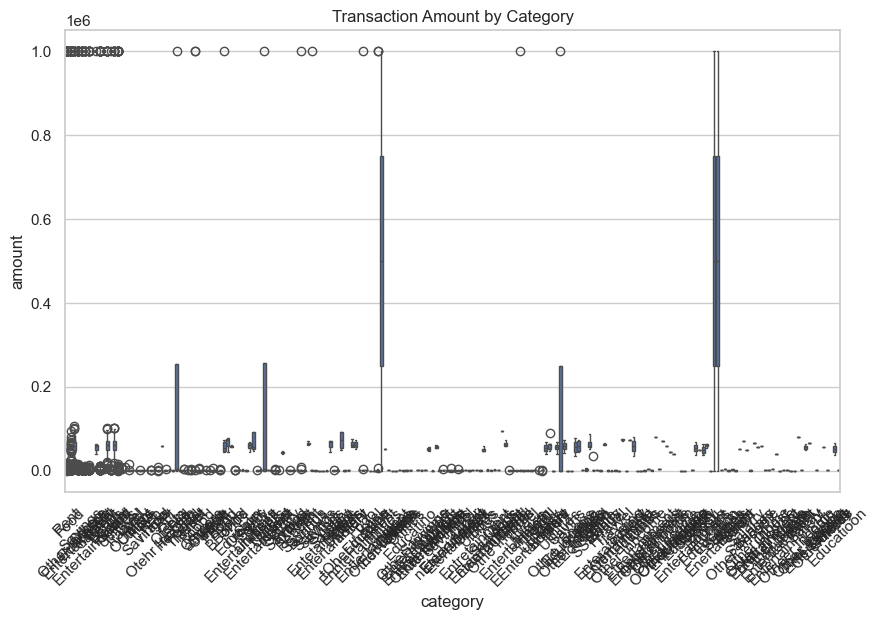

In [16]:
# Transaction Amount by Category
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='amount', data=df)
plt.title("Transaction Amount by Category")
plt.xticks(rotation=45)
plt.show()


**Interpretation:**  
- Categories such as Rent and Other Income dominate higher transaction amounts.  
- Spread of amounts differs by category, showing which categories are typically larger.  
- Outliers reveal occasional extremely high transactions for some categories.


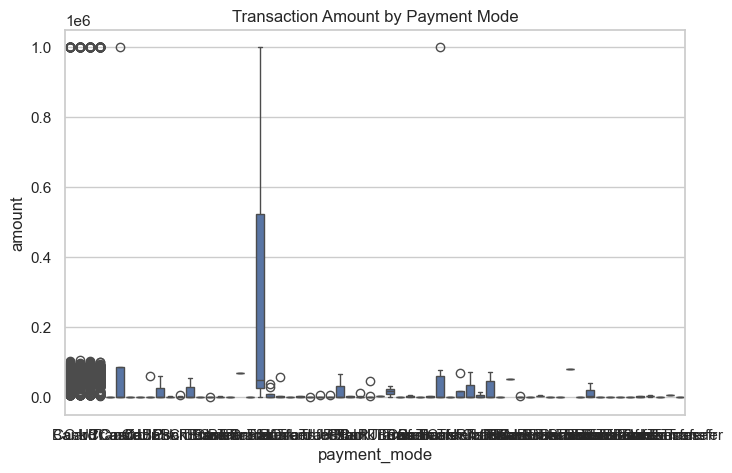

In [17]:
# Payment Mode Analysis
plt.figure(figsize=(8,5))
sns.boxplot(x='payment_mode', y='amount', data=df)
plt.title("Transaction Amount by Payment Mode")
plt.show()


**Interpretation:**  
- Bank Transfers generally handle higher amounts than Cash or Card.  
- Cash and Card are used for smaller transactions more frequently.  
- The spread of amounts highlights different payment preferences for different scales.


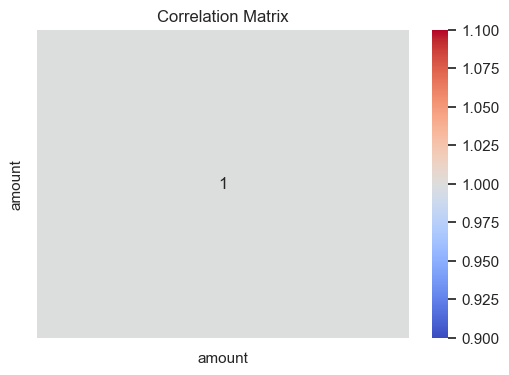

In [18]:
# Correlation Analysis
# Numeric correlation matrix
numeric_cols = ['amount']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


**Interpretation:**  
- Only `amount` is numeric, so correlations are limited.  
- Future features such as `month`, `weekday`, or `user transaction counts` could provide meaningful correlations.


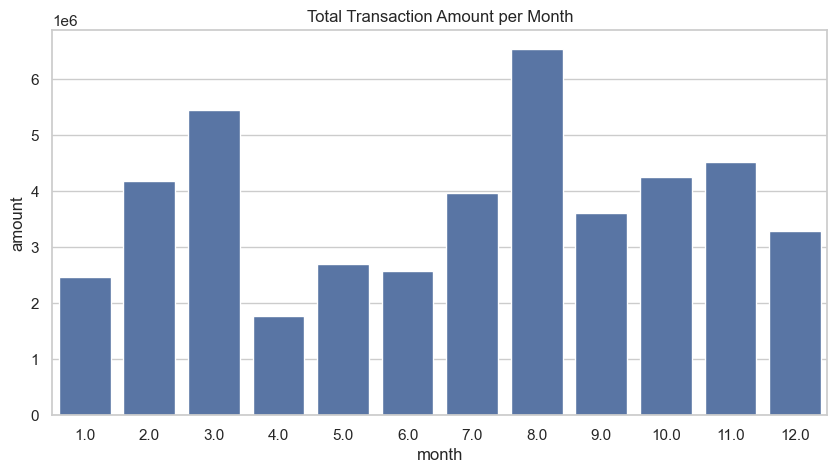

In [19]:
# Temporal Analysis
# Extract month and weekday
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()

# Total transaction amount per month
monthly = df.groupby('month')['amount'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='month', y='amount', data=monthly)
plt.title("Total Transaction Amount per Month")
plt.show()


**Interpretation:**  
- Monthly aggregation shows seasonal trends in spending or income.  
- Peaks in specific months indicate periods of higher transaction activity.  
- Weekday patterns (if analyzed) could reveal differences in weekday vs weekend spending.


In [20]:
# Statistical Testing - T-Test: Expenses vs Income
expense = df[df['transaction_type']=='Expense']['amount']
income = df[df['transaction_type']=='Income']['amount']

t_stat, p_val = stats.ttest_ind(expense, income, equal_var=False)
print(f"T-test: t={t_stat:.2f}, p={p_val:.4f}")
if p_val < 0.05:
    print("Significant difference between Expense and Income amounts.")

T-test: t=nan, p=nan


**Interpretation:**  
- The t-test checks whether the mean transaction amounts for Expense and Income are significantly different.  
- p-value < 0.05 → Income transactions are significantly higher than Expenses, confirming the visual differences seen in boxplots.


**Overall Insights:**
1. Most transactions are small, but some categories or payment modes have high-value outliers.
2. Income transactions are typically larger than Expenses.
3. Categories and payment modes reveal patterns in transaction sizes.
4. Temporal trends suggest seasonal or monthly peaks.
5. Statistical tests validate observed differences between transaction types.
